<a href="https://colab.research.google.com/github/PedroDS4/Filtros_FIR/blob/main/Filtragem_com_Filtros_FIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Implementação de uma Biblioteca de filtros digitais FIR**

##**Filtros FIR**
Os filtros FIR se baseiam no conceito de construir filtro que imitaria a resposta de um filtro ideal porém com um truncamento que limita o número de amostras, ai vem o significado do nome dado a esse tipo de filtro(Finite Impulse Response), que significa que sua resposta ao impulso é limitada em suporte temporal, além disso existe uma relação de compromisso entre o custo computacional e a qualidade do filtro.

Abaixo estão deduzidas as expressões para 4 respostas impulsivas ideais dos quatro tipos de filtro utilizados no processamento de sinais.


###**Passa-baixas**
O filtro passa-baixas ideal pode ser modelado no domínio da frequência como uma janela retangular que deixa passar apenas baixas frequências, a partir de um limiar, esse limiar é chamado de frequência de corte, então definimos esse filtro como:

$$
H(\omega) = \begin{cases}
1, & \text{se } |\omega| \leq \omega_c \\
0, & \text{caso contrário}
\end{cases}
$$

para passarmos isso pro domínio do tempo discreto utilizando a transformada de fourier de tempo discreto inversa

$$
h[n] = \frac{1}{2\pi} \int_{-\infty}^{\infty} H(\omega) e^{j\omega n} d\omega
$$

como a integral só existe de $-\omega_c$ até $\omega_c$, e nesse intervalo a resposta em frequência é unitária, então:

$$
h[n] = \frac{1}{2\pi} \int_{-\omega_c}^{\omega_c} e^{j\omega n} d\omega
$$

a integral interna é uma integral de exponencial, que é ela mesma dividida pela derivada do expoente, ja que ele é uma função linear de $\omega$:

$$
\int_{-\omega_c}^{\omega_c} e^{j\omega n} d\omega =  \left. \frac{e^{j\omega n}}{jn} \right|_{-\omega_c}^{\omega_c} = \frac{e^{j\omega_c n}}{jn} - \frac{e^{-j\omega_c n}}{jn} = \frac{e^{j\omega_c n} - e^{-j\omega_c n}}{jn}
$$

utilizando a identidade de Euler
$$
sen(\theta) = \frac{e^{j\theta} - e^{-j\theta}}{2j}
$$


, temos então


$$
h[n] = \frac{1}{2\pi} \int_{-\infty}^{\infty} H(\omega) e^{j\omega n} d\omega
 = \frac{  2 sen(\omega_c n) }{2\pi n}
$$

então a fórmula analítica de um filtro passa-baixas no domínio de tempo discreto é dada por


$$
h[n] = \frac{ sen(\omega_c n) }{\pi n} = \frac{w_c}{\pi} sinc(w_c n]
$$



###**Passa-altas**

A expressão analítica para o filtro passa-altas, que só passa altas frequências a partir da frequência de corte, pode ser obtido da mesma maneira, sendo o filtro passa altas no domínio da frequência definido por


$$
H(\omega) = \begin{cases}
0, & \text{se } |\omega| \leq \omega_c \\
1, & \text{caso contrário}
\end{cases}
$$


então podemos mais uma vez aplicar a transformada de fourier inversa para obter a resposta temporal discreta, então

$$
h[n] = \frac{1}{2\pi} \int_{-\infty}^{\infty} H(\omega) e^{j\omega n} d\omega
$$

porém essa integral pode ser separada em duas parcelas, uma de menos infinito até o negativo da frequência de corte, e uma da frequência de corte até o mais infinito, e a resposta em frequência nesses intervalos ambas valem 1, então:


$$
h[n] = \frac{1}{2\pi} \int_{-\infty}^{-\omega_c} e^{j\omega n} d\omega
+ \frac{1}{2\pi} \int_{\omega_c}^{\infty} e^{j\omega n} d\omega
$$


calculando mais uma vez a integral da exponencial, temos

$$
h[n] = \frac{1}{2\pi} ( \left. \frac{e^{j\omega n}}{jn} \right|_{-\infty}^{-\omega_c} + \left. \frac{e^{j\omega n}}{jn} \right|_{\omega_c}^{\infty})
$$

reescrevendo agora como uma integral imprópria, temos:

$$
h[n] = \frac{1}{2\pi} ( \lim_{b \to \infty}  \left. \frac{e^{j\omega n}}{jn} \right|_{-b}^{-\omega_c} + \left. \frac{e^{j\omega n}}{jn} \right|_{\omega_c}^{b})
$$

agora aplicando nos limites de integração

$$
h[n] = \frac{1}{2\pi}  ( \lim_{b \to \infty} \frac{e^{-j\omega_c n}}{jn} - \frac{e^{-j b n}}{jn} +  \frac{e^{jb n}}{jn} - \frac{e^{j\omega_c n}}{jn} )
$$

rearranjando agora os termos, e considerando que os termos que não contém a variável b são constantes em relação a um limite, temos

$$
h[n] = \frac{1}{2\pi}  ( \lim_{b \to \infty} [\frac{e^{jb n}}{jn}  - \frac{e^{-j b n}}{jn}] + \frac{e^{-j\omega_c n}}{jn} - \frac{e^{j\omega_c n}}{jn} )
$$

e utilizando a identidade de euler

$$
h[n] = \frac{1}{2\pi}  ( \lim_{b \to \infty} [\frac{2 sen(b n)}{n}] - \frac{2sen(w_cn)}{n} )
$$

por fim temos que o limite entre colchetes é um resultado conhecido da análise de sinais, e é dado por

$$
\lim_{b \to \infty} \frac{sen(b n)}{n} = \pi \delta[n]
$$


então por fim a resposta ao impulso se torna:

$$
h[n] = \delta[n] - \frac{sen(w_cn)}{\pi n} = \delta[n] - \frac{\omega_c}{\pi} sinc[\omega_c n]
$$

que pode ser visto como o complementar de um filtro passa-baixas, como:

$$
h_{HP}[n] = \delta[n] - h_{LP}[n]
$$

que na frequência de torna:

$$
H_{HP}(\omega) = 1 - H_{LP}(\omega)
$$

###**Passa-faixas**

O filtro passa-faixas ideal no domínio da frequência e modelado como


$$
H(\omega) = \begin{cases}
1, & \text{se }  \omega_{1} \leq |\omega| \leq \omega_{2}
 \\
0, & \text{caso contrário}  
\end{cases}
$$

Aplicando mais uma vez a transformada de fourier de tempo discreto inversa, temos

$$
h[n] = \frac{1}{2\pi} \int_{-\infty}^{\infty} H(\omega) e^{j\omega n} d\omega
$$

como essa resposta em frequência é zero em todos os pontos excluindo os pontos entre as frequências de corte, temos:

$$
h[n] = \frac{1}{2\pi} \int_{-\omega_2}^{-\omega_1} e^{j\omega n} d\omega
+ \frac{1}{2\pi} \int_{\omega_1}^{\omega_2} e^{j\omega n} d\omega = \frac{1}{2\pi} ( \left. \frac{e^{j\omega n}}{jn} \right|_{-\omega_2}^{-\omega_1} + \left. \frac{e^{j\omega n}}{jn} \right|_{\omega_1}^{\omega_2})
$$

avaliando nos limites de integração

$$
h[n] = \frac{1}{2\pi} ( \frac{e^{-j\omega_1 n}}{jn} - \frac{e^{-j \omega_2 n}}{jn} +  \frac{e^{j\omega_2 n}}{jn} - \frac{e^{j\omega_1 n}}{jn} )
$$

reorganizado temos ainda

$$
h[n] = \frac{1}{2\pi} ( \frac{e^{j\omega_2 n}- e^{-j \omega_2 n} }{jn} - [\frac{e^{j\omega_1 n} - e^{-j\omega_1 n}}{jn}] )
$$


simplificando pela identidade de euler, finalmente temos


$$
h[n] = \frac{ sen(\omega_2 n) }{\pi n} - \frac{ sen(\omega_1 n) }{\pi n}
$$

###**Rejeita-faixas**

Por analogia, o filtro rejeita-faixas é o complementar do filtro passa-faixas, então

$$
H_{BS}(\omega) = 1 - H_{BP}(\omega)
$$

aplicando a transformada de fourier inversa, temos

$$
h_{BS}[n] = \delta [n] - h_{BP}[n] =  \delta [n] + \frac{ sen(\omega_1 n) }{\pi n}  - \frac{ sen(\omega_2 n) }{\pi n}  
$$




##**Janelamento**
Um filtro de extensão infinita é irrealizável, ja que precisariamos de infinitas amostras, o que na pratica, não é computacionalmente possível, então o que fazemos é multiplicar a resposta ao impulso por uma janela de truncamento para limitar o número de amostras.
Foi observado que cada função janela produz um efeito na frequência, normalmente atenuando mais ou menos dependendo da região, de acordo com a janela.

**Retangular**

A janela retangular é uma função constante em 1 para as amostras no intervalo predefinido, é equivalente de pegar apenas um número fixo finito de amostras, dada por

$$
W[n] = \begin{cases}
1, & \text{se }  0 \leq n \leq M \\
0, & \text{caso contrário}
\end{cases}
$$

**Barlet(Triangular)**

A janela triangular ja começa a causar algumas distorções temporais no sinal ideal do filtro, porém no domínio da frequência esses efeitos muitas vezes são desejáveis e podem melhorar algumas características do filtro,

$$
W[n] = \begin{cases} 2n/M, & \text{se }  0 \leq n \leq \frac{M}{2} \\ 2 - 2n/M, & \text{se}  -\frac{M}{2} \leq n \leq \frac{M}{2}   \\  0, \ \text{c.c}   \end{cases}
$$




**Hann**

Assim como na janela de Barlet, os efeitos desse janelamento na frequência muitas vezes são também desejáveis, como por exemplo a atenuação na região de rejeição.


$$
W[n] = \begin{cases}
0.5 - 0.5cos(2 \pi n/M), & \text{se }  0 \leq n \leq M \\
0, & \text{caso contrário}
\end{cases}
$$


**Hamming**

A Janela de hamming causa um pouco mais de distorções no tempo do que uma janela retangular, mas os efeitos na frequência muitas vezes são desejáveis


$$
W[n] = \begin{cases}
0.54 - 0.46cos(2 \pi n/M), & \text{se }  0 \leq n \leq M \\
0, & \text{caso contrário}
\end{cases}
$$




**Janela de Kaiser**

Vimos que as janelas anteriores sempre introduzem uma distorção no domínio do tempo, que pode ser benéfica no domínio da frequência e melhorar as características do filtro, porém projetar um filtro e escolher a janela muitas vezes pode parecer monótomo e gerar a pergunta: Não tem uma janela generalizada que possa fazer tudo que as outras fazem?

E a resposta é que existe!

A janela de kaiser faz justamente o que essa ideia sugere, e é parametrizada para ser uma generalização que pode acompanhar qualquer um dos requisitos de filtros, sua expressão discreta é mostrada abaixo:

$$
W[n] = \begin{cases} I_0[\beta(1 - [\frac{n-\alpha}{\alpha}]^2)^{\frac{1}{2}}], & \text{se }  0 \leq n \leq M \\ 0, & \text{caso contrário} \end{cases} $$

onde $I_0$ representa uma função de bessel de ordem $0$, $\beta$ representa um parâmetro que depende da atenuação, e $\alpha = \frac{M}{2}$

A função de bessel de ordem $m$ é dada por

$$
I_{m}(x) = \sum_{n = 0}^{\infty} \frac{(-1)^n}{n! (n+m)!} (\frac{x}{2})^{2n+m}
$$

O parâmetro $\beta$ foi determinado como uma função da atenuação, empiricamente como:

$$
\beta(A) = \begin{cases} 0.1102(A-8.7), & \text{se }  A > 50 \\ 0.5842(A-21)^0.4 + 0.07886(A-21), & \text{se} \ 21 \leq A \leq 50   \\  0, \ \text{se} \ A<21   \end{cases}
$$




**Referências**

* OPPENHEIM, Alan V.; SCHAFER, Ronald W. Processamento digital de sinais. Tradução de Sônia R. Ribeiro. 2. ed. São Paulo: Pearson Prentice Hall, 2010.

##**Funções Importantes**

In [ ]:
#Bibliotecas de Filtros


#Funçãos gerais usadas nos projetos dos filtros

##Função impulso
def impulso(n):
    return 1 if n == 0 else 0


# Função sinc
def sinc(wc, n):
    if n == 0:
      return wc / np.pi
    else:
      return np.sin(wc * n) / (np.pi * n)


#Filtro desejado
def hd(n):
  y = impulso(n)+sinc(wc1,n)-sinc(wc2,n)
  return y


#Funções específicas

#Filtro desejado
def hd(n):
  y = impulso(n)+sinc(wc1,n)-sinc(wc2,n)
  return y


#Função Janela
def janela(n):
  if n>=0 and n<=M:
    return 0.5*(1-np.cos(2*np.pi*n/M))
  else:
    return 0



#Função Janela
def janela(n):
  if n>=0 and n<=M:
    return 0.5*(1-np.cos(2*np.pi*n/M))
  else:
    return 0

##################################################################################################################################################################################################################################################


def plot_completo(nome_x,nome_y,nome_grafico,vetor_x,vetor_y,a,cor):

  alf = np.array(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'])
  fig, a = plt.subplots()

  a.set(xlabel = nome_x ,ylabel = nome_y ,title = nome_grafico)
  a.plot(vetor_x,vetor_y,cor)
  a.grid()


##**Ambiente de Simulação**
Filtro Rejeita-faixas para remoção de ruído impulsivo


Saving Audio.wav to Audio (2).wav


<Figure size 1200x1000 with 0 Axes>

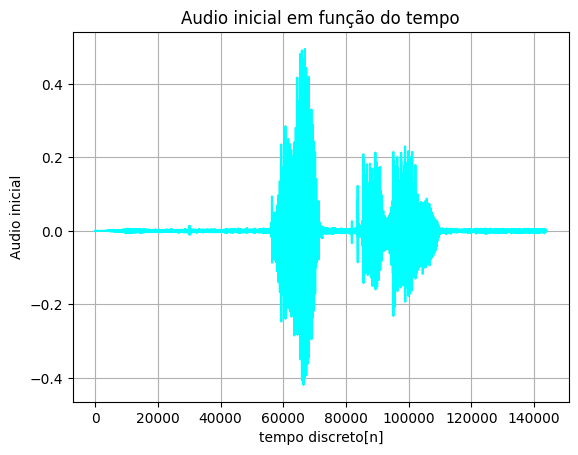

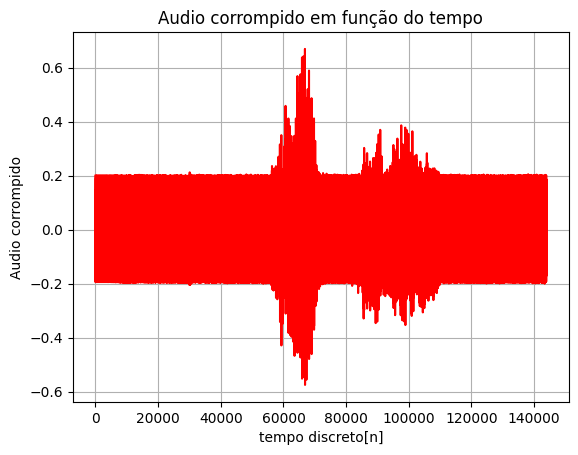

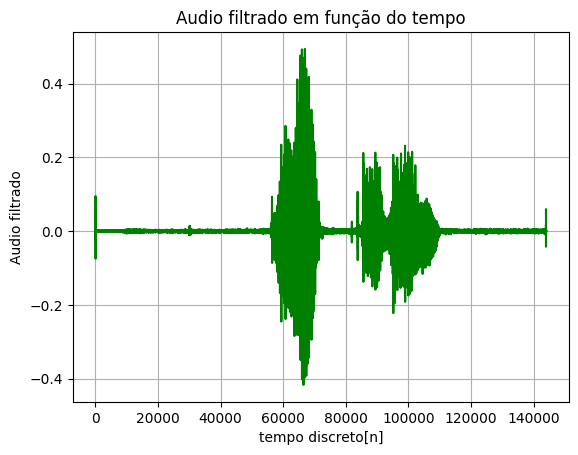

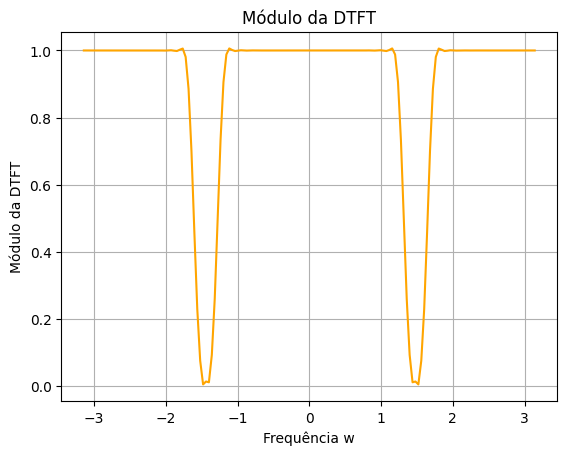

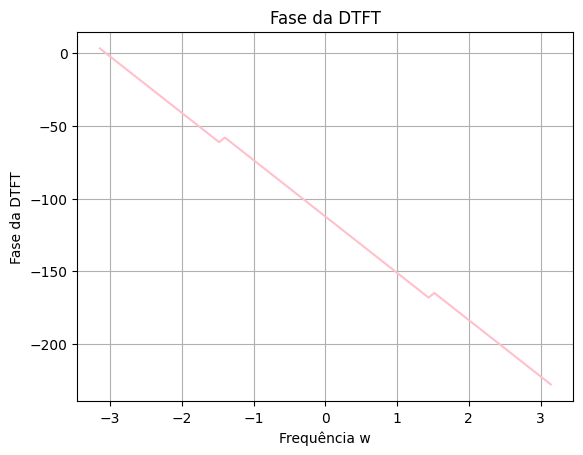

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import *
from google.colab import files
import math

# Carregar o arquivo de áudio
uploaded = files.upload()

input_audio_path = 'Audio.wav'
input_audio, sr_audio = sf.read(input_audio_path)

# Normalizar o áudio de entrada
#input_audio = input_audio / np.max(np.abs(input_audio))

# Parâmetros do projeto do filtro
a1 = 0.1
a2 = 0.1
f1 = 5400
f2 = 5700
fn = 44100
T = 1/sr_audio
s_2 = 0.0316
delta_w = 0.04 * np.pi
delta_f = delta_w / (2 * np.pi)
M = math.ceil(3.1 / delta_f)
if M % 2 != 0:
    M += 1

ws1 = 2 * np.pi * (f1+0.2)
wp2 = 2 * np.pi * (f2-0.2)

wc1 = (ws1*T - delta_w / 2)
wc2 = (wp2*T + delta_w / 2)


# Função r(t) para modelar um ruído impulsivo
def r(t):
    return a1 * np.cos(2 * np.pi * f1 * t) + a2 * np.cos(2 * np.pi * f2 * t)




#Vetor simétrico de frequências
k = np.arange(-M/2,M/2,1)

#Vetor de tempo discreto para o filtro
n_h = np.arange(0,M,1)


h = np.empty(M)

for i in range(0,len(h)):
  h[i] = hd(i-M/2)*janela(i)


# Criação do vetor de tempo e sinal corrompido
#Vetor de tempo discreto
n = np.arange(0,len(input_audio),1)

#Amostragem do Ruído
R = r(n*T)

audio_corrompido = input_audio + R;
audio = np.convolve(audio_corrompido, h, mode = 'full')

# Função para calcular a DTFT
def dtft(x, n, k):
    W = np.exp(-1j * (np.pi / M )* np.outer(k, n))
    X = np.dot(W, x)
    return X

# Calculando a DTFT
H = dtft(h, n_h, k)

#Vetor de frequências
w = np.linspace(-np.pi,np.pi,len(H))




#Plotando os áudios no tempo

fig = plt.figure(figsize=(12, 10))

plot_completo("tempo discreto[n]","Audio inicial","Audio inicial em função do tempo",n,input_audio,"ax","cyan")
plot_completo("tempo discreto[n]","Audio corrompido","Audio corrompido em função do tempo",n,audio_corrompido,"ax","red")
plot_completo("tempo discreto[n]","Audio filtrado","Audio filtrado em função do tempo",np.linspace(0,len(audio),len(audio)),audio,"ax","green")
plot_completo("Frequência w","Módulo da DTFT","Módulo da DTFT",w,np.abs(H),"ax","orange")
plot_completo("Frequência w","Fase da DTFT","Fase da DTFT",w,np.unwrap(np.angle(H)),"ax","pink")
plt.show()

sf.write('Audio_filtrado.wav', audio, sr_audio)
files.download('Audio_filtrado.wav')
